In [1]:
pwd

'/sdf/group/ad/beamphysics/fft-bpm/CrystalBPM_11_21_2025P/examples'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['figure.figsize'] = (8,7)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [4]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
import XCrTools as tools
omega0 = 12800.0

xcr = XCrystal(XCr_path+'/config/C333_Omega12p8keV_waist250um.yaml', omega0)
xtools = tools.XCrTools(xcr)



In [5]:
pwd

'/sdf/group/ad/beamphysics/fft-bpm/CrystalBPM_11_21_2025P/examples'

In [6]:
U1file = 'run_omega_U1_22_42_C333_12800_eVwaist250.npy'
U2file = 'run_omega_U2_22_42_C333_12800_eVwaist250.npy'
w_sim_file='C333_12800_eVwaist250w_sim.npy'
U1_wxyz = np.load(U1file)
U2_wxyz = np.load(U2file)
w_sim=np.load(w_sim_file)

In [7]:
U1_wxyz.shape
xcr.configure(8e-6,xcr.omega0)

No deformation model was selected


In [8]:
type(xcr.xgrid)

int

In [9]:
IJ=33

12800.0

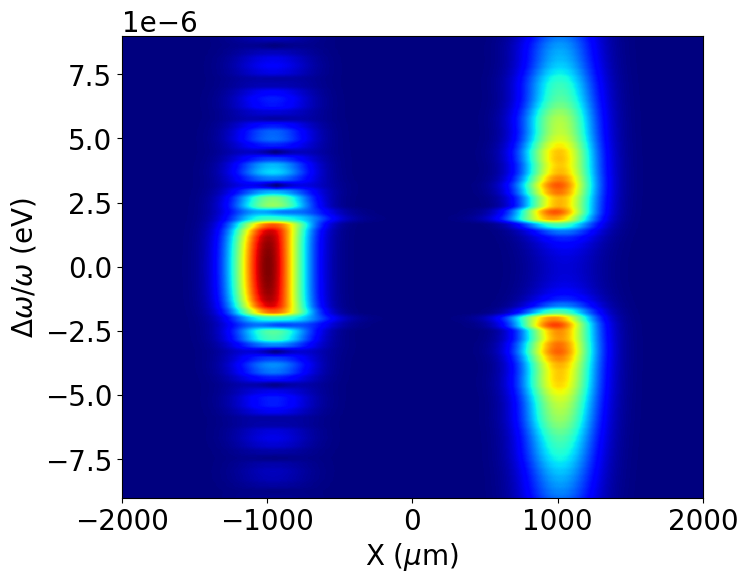

In [10]:

plt.figure(figsize=(7.5,6))
plt.imshow(np.abs(U1_wxyz[:,:,0,IJ])**1 + np.abs(U2_wxyz[:,:,0,IJ])**1,extent = [-xcr.xxmax / xcr.convr * 1e6, xcr.xxmax / xcr.convr * 1e6, np.max(w_sim)/xcr.omega0-5e-6, np.min(w_sim)/xcr.omega0-5e-6] ,aspect='auto',cmap='jet')
plt.xlabel(r'X ($\mu$m)')
plt.ylabel(r'$\Delta \omega/\omega$ (eV)')
plt.ylim(-9e-6,9e-6)
xcr.omega0

In [11]:
U1_wx = U1_wxyz[:, :, 0, :]
U2_wx = U2_wxyz[:, :, 0, :]

U1_tx = np.fft.ifft(U1_wx, axis=0)
U2_tx = np.fft.ifft(U2_wx, axis=0)
U1_tx=np.roll(U1_tx, shift=400, axis=0)
U2_tx=np.roll(U2_tx, shift=400, axis=0)

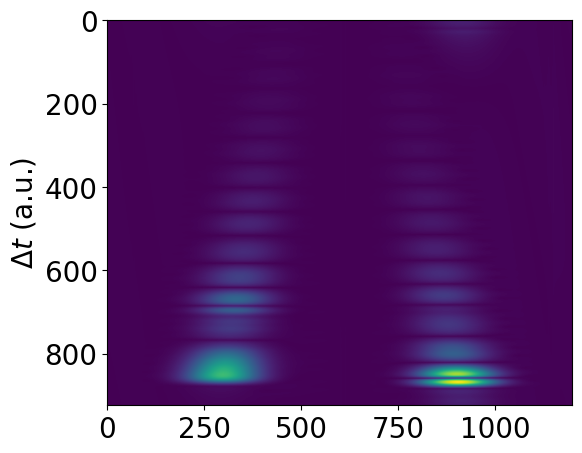

In [12]:
It=33
U1_txIt=U1_tx[:,:,It];
U2_txIt=U2_tx[:,:,It];
plt.figure(figsize=(6,5))
plt.imshow(np.abs(U1_txIt*1+U2_txIt*1)**0.7, aspect='auto')
plt.ylabel(r'$\Delta t$ (a.u.)')
#plt.ylim(400,100)
#plt.xlim(1000,3000)
#plt.grid()
plt.show()

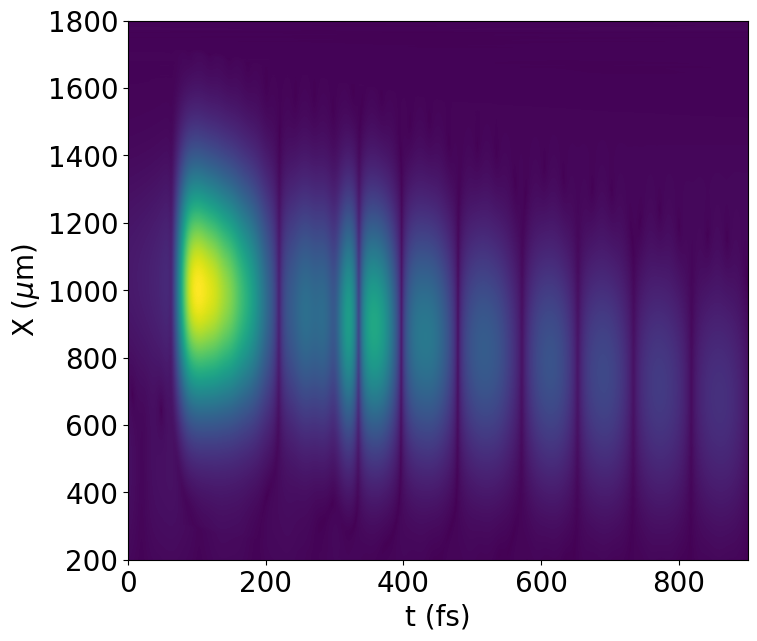

In [13]:


UPj=np.abs(U1_txIt*1)**0.5
rUPj=np.rot90(UPj,k=3)
plt.imshow(rUPj,extent=[ 0,xcr.tmax*1e15,-xcr.xxmax / xcr.convr * 1e6, xcr.xxmax / xcr.convr * 1e6], aspect='auto')
plt.ylabel(r'X ($\mu$m)')
plt.xlabel(r't (fs)')
plt.xlim(0,900)
plt.ylim(200, 1800)
plt.show(8,4)